# Setup

In [1]:

import torch

from utils.combine_images_based_on_layout_dm import combine_images_based_on_layout_dm
from utils.generate_input_from_directory import generate_input_from_directory
from utils.generate_input_from_tensors import generate_input_from_tensors
from utils.predict_layout import predict_layout
#from utils.print_attrs import print_attrs

/home/maciejkozubal/miniconda3/envs/layout-dm/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maciejkozubal/miniconda3/envs/layout-dm/lib/python3.7/site-packages/torch_geometric/typing.py:31: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/maciejkozubal/miniconda3/envs/layout-dm/lib/python3.7/site-packages/torch_geometric/typing.py:42: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/home/maciejkozubal/minic

# Recommened approach

Recommendations:
- model:            Rico
- condition typ:    cwh ("C+S -> P": reposition without resizing)
    
Optional:
- canvas_size - from the output of the generate_input_from_directory() function
- W_CANVAS
- n_samples (default: 4)

1. Input
    - Put input objects in the `input/`` subdirectories:
        - header files (in `input/headers`)
        - schema: `*.header`
        - images (in `input/images/`)
        - schema: `*_background.png`, `*_product.png`, or `*_logo.png`
        - text files (in `input/texts`)
        - schema: `*.txt`
    - `custom_input, list_files, canvas_dimensions = generate_input_from_directory()`

2. Predict layout
    - generate input tensors from objects in data/
    - `pred, predicted_layout_json = predict_layout(custom_input, list_files, canvas_dimensions = canvas_dimensions)`
    - the predicted layouts from layoutdm in a json format (predicted_layouts.json)

3. Combine images
    - for visualization purpose
    - combine the input elements into the output png file, based on the layoutdm predicted layouts (predicted_layouts.json)
    - `combine_images_based_on_layout_dm(verbatim=verbatim)`


 ####################  Input generated based on objects in input/ subdirectories  ####################

test_background.png
	bbox:	tensor([0.5000, 0.5000, 1.0000, 1.0000])
	label:	'Background Image' (layoutdm_rico[6])

test_product.png
	bbox:	tensor([0.5000, 0.5000, 0.4000, 0.4993])
	label:	'Image' (layoutdm_rico[1])

test_logo.png
	bbox:	tensor([0.5000, 0.5000, 0.1500, 0.2339])
	label:	'Image' (layoutdm_rico[1])

test_header.header
	bbox:	tensor([0.5000, 0.5000, 0.5630, 0.0885])
	label:	'Text' (layoutdm_rico[0])

test2.txt
	bbox:	tensor([0.5000, 0.5000, 0.0720, 0.3778])
	label:	'Text' (layoutdm_rico[0])

test1.txt
	bbox:	tensor([0.5000, 0.5000, 0.7410, 0.0390])
	label:	'Text' (layoutdm_rico[0])

 ####################  Input visualization, elements and their dimensions ####################


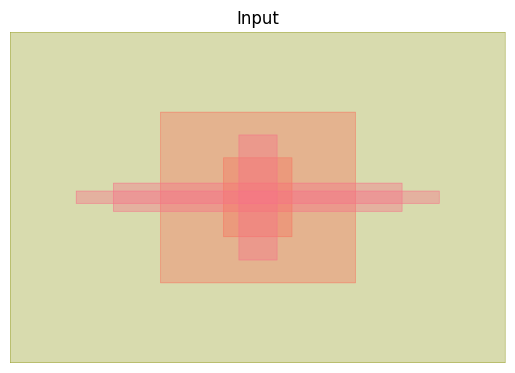


 ####################  Input visualization, labels  ####################


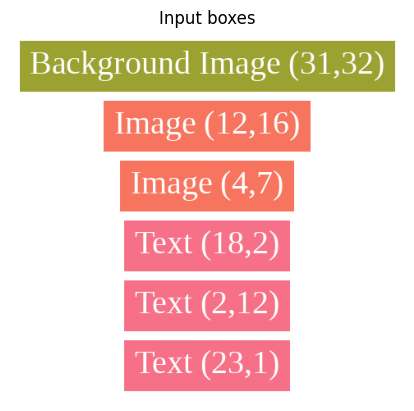


 ####################  Output visualization  ####################


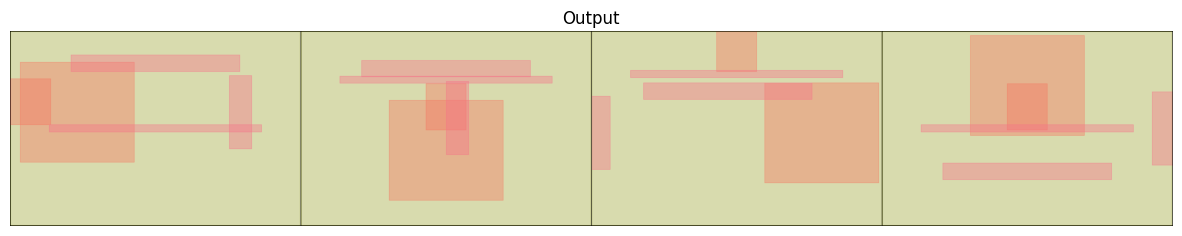

####################  Predicted layouts  ####################

Page 0:
test_background.png:		(0.5, 0.5, 1.0, 1.0)
test_product.png:		(0.23, 0.416, 0.393, 0.516)
test_logo.png:		(0.07, 0.362, 0.138, 0.238)
test_header.header:		(0.5, 0.164, 0.582, 0.085)
test2.txt:		(0.794, 0.416, 0.077, 0.378)
test1.txt:		(0.5, 0.5, 0.732, 0.037)

Page 1:
test_background.png:		(0.5, 0.5, 1.0, 1.0)
test_product.png:		(0.5, 0.614, 0.393, 0.516)
test_logo.png:		(0.5, 0.389, 0.138, 0.238)
test_header.header:		(0.5, 0.191, 0.582, 0.085)
test2.txt:		(0.54, 0.446, 0.077, 0.378)
test1.txt:		(0.5, 0.249, 0.732, 0.037)

Page 2:
test_background.png:		(0.5, 0.5, 1.0, 1.0)
test_product.png:		(0.794, 0.523, 0.393, 0.516)
test_logo.png:		(0.5, 0.088, 0.138, 0.238)
test_header.header:		(0.47, 0.308, 0.582, 0.085)
test2.txt:		(0.025, 0.523, 0.077, 0.378)
test1.txt:		(0.5, 0.22, 0.732, 0.037)

Page 3:
test_background.png:		(0.5, 0.5, 1.0, 1.0)
test_product.png:		(0.5, 0.278, 0.393, 0.516)
test_logo.png:		(0.5, 0.389, 0.1

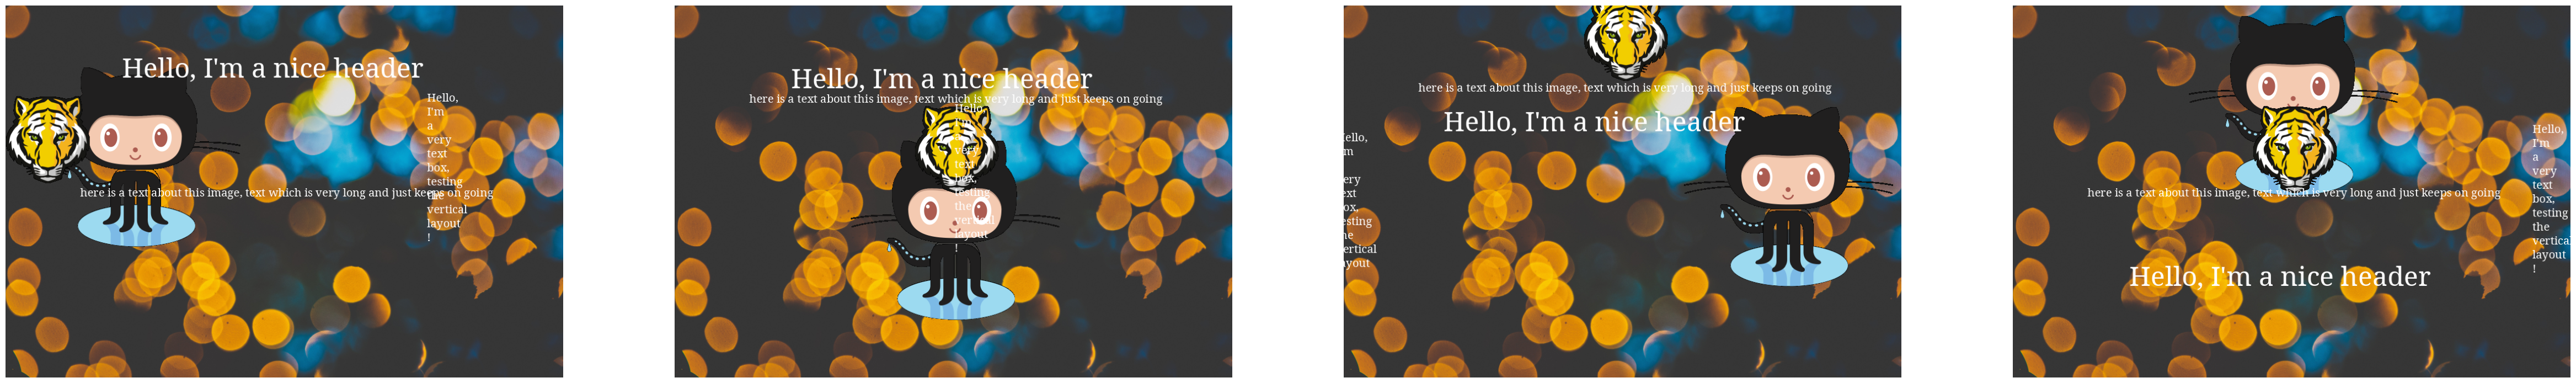

In [5]:
verbatim = True

custom_input, list_files, canvas_dimensions = generate_input_from_directory(verbatim=verbatim)

pred, predicted_layout_json = predict_layout(custom_input,
                      list_files,
                      model_name='layoutdm_rico',
                      cond_type='cwh',
                      canvas_dimensions = canvas_dimensions,
                      verbatim=True,
                      n_samples=4,
                      )

combine_images_based_on_layout_dm(verbatim=verbatim)

# Compare input generation methods

## 1. generate from tensors (user passed of default)


In [3]:
custom_input_from_tensor_default = generate_input_from_tensors(verbatim=True)

bboxes:
tensor([[0.5000, 0.5000, 0.1000, 0.6000],
        [0.5000, 0.5000, 0.6000, 0.1000],
        [0.5000, 0.5000, 0.2000, 0.2000],
        [0.5000, 0.5000, 0.4000, 0.4000],
        [0.8000, 0.8000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.1000, 0.1000]])
labels: tensor([0, 1, 6, 4, 0, 0])



In [4]:
custom_input_from_tensor = generate_input_from_tensors(
    bboxes_tensor = torch.FloatTensor([
        [0.5, 0.5, 0.1, 0.6],
        [0.5, 0.5, 0.6, 0.1],
        [0.5, 0.5, 0.2, 0.2],
        [0.5, 0.5, 0.4, 0.4],
        [0.8, 0.8, 0.1, 0.1],
        [0.2, 0.2, 0.1, 0.1]
    ]),
    labels_tensor = torch.LongTensor([0, 1, 6, 4, 0, 0]),
    verbatim=True
)

bboxes:
tensor([[0.5000, 0.5000, 0.1000, 0.6000],
        [0.5000, 0.5000, 0.6000, 0.1000],
        [0.5000, 0.5000, 0.2000, 0.2000],
        [0.5000, 0.5000, 0.4000, 0.4000],
        [0.8000, 0.8000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.1000, 0.1000]])
labels: tensor([0, 1, 6, 4, 0, 0])



## 2. generate based on files from input directory

In [5]:
custom_input_from_data_directory, list_files, canvas_dimensions = generate_input_from_directory(verbatim=True)


 ####################  Input generated based on objects in input/ subdirectories  ####################

test_background.png
	bbox:	tensor([0.5000, 0.5000, 1.0000, 1.0000])
	label:	'Background Image' (layoutdm_rico[6])

test_product.png
	bbox:	tensor([0.5000, 0.5000, 0.4000, 0.4993])
	label:	'Image' (layoutdm_rico[1])

test_logo.png
	bbox:	tensor([0.5000, 0.5000, 0.1500, 0.2339])
	label:	'Image' (layoutdm_rico[1])

test_header.header
	bbox:	tensor([0.5000, 0.5000, 0.5630, 0.0885])
	label:	'Text' (layoutdm_rico[0])

test2.txt
	bbox:	tensor([0.5000, 0.5000, 0.0720, 0.3778])
	label:	'Text' (layoutdm_rico[0])

test1.txt
	bbox:	tensor([0.5000, 0.5000, 0.7410, 0.0390])
	label:	'Text' (layoutdm_rico[0])


# Comaparison of models 

## 1. Trained on Rico dataset (default)
`model_name = layoutdm_publaynet`

### 1.1. Condition type 'c'
C -> S+P (reposition and resize)


 ####################  Input visualization, elements and their dimensions ####################


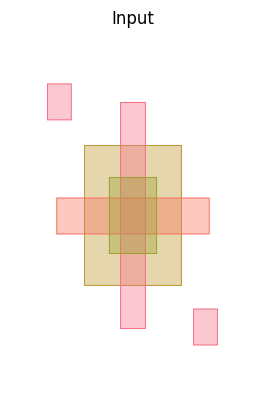


 ####################  Input visualization, labels  ####################


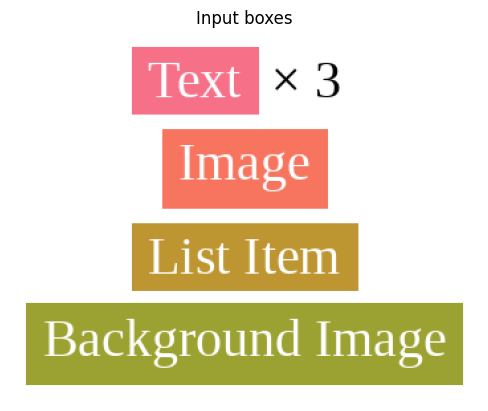


 ####################  Output visualization  ####################


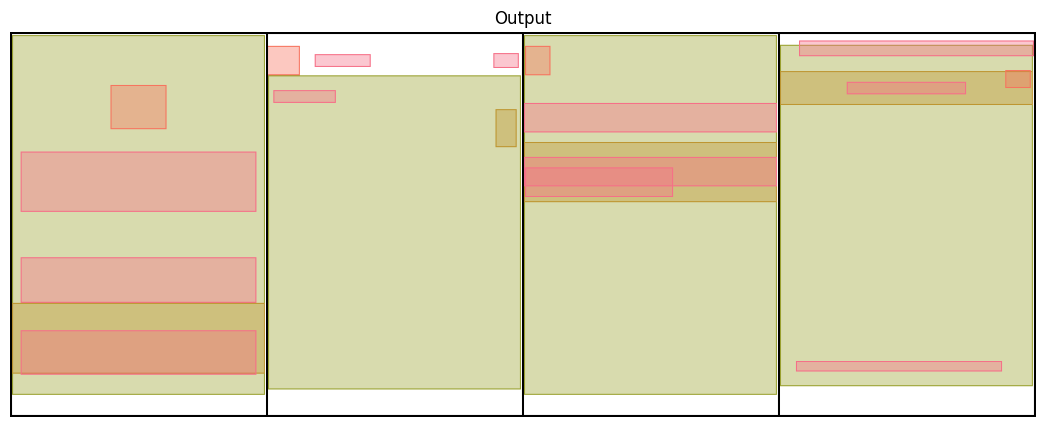

In [6]:
pred, _ = predict_layout(custom_input_from_tensor_default, list_files, model_name='layoutdm_rico', cond_type='c', verbatim=True, save_output=False)

### 1.2. Condition type 'cwh'
C+S -> P (reposition and dont' resize)


 ####################  Input visualization, elements and their dimensions ####################


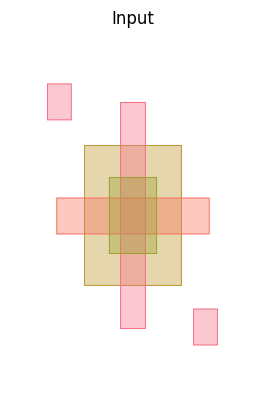


 ####################  Input visualization, labels  ####################


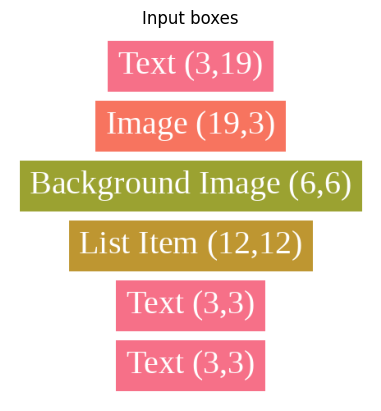


 ####################  Output visualization  ####################


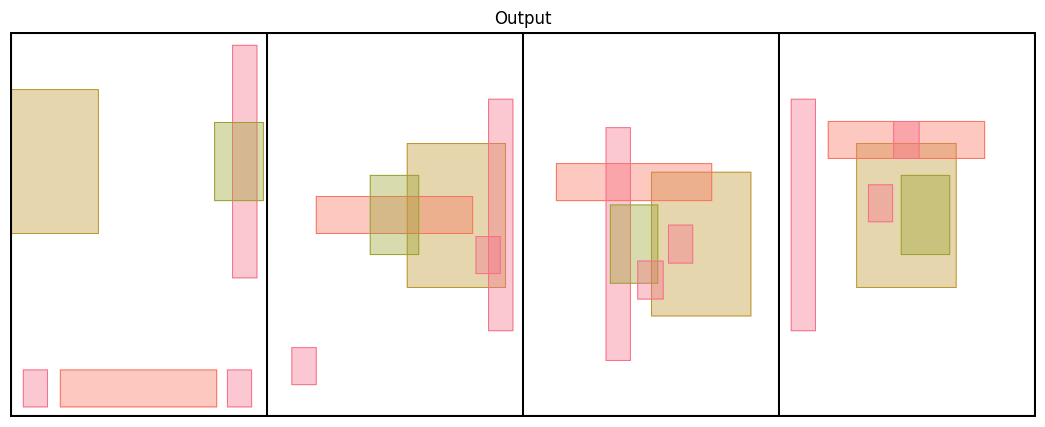

In [7]:
pred, _ = predict_layout(custom_input_from_tensor_default, list_files, model_name='layoutdm_rico', cond_type='cwh', verbatim=True, save_output=False)

## 2. Trained on PubLayNet dataset
`model_name = layoutdm_publaynet`

### 2.1. Condition type 'c'
C -> S+P (reposition and resize)


 ####################  Input visualization, elements and their dimensions ####################


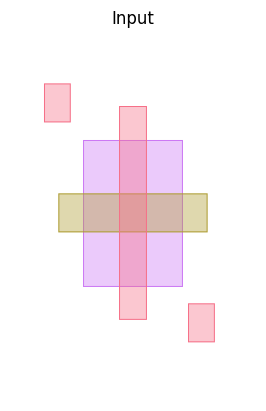


 ####################  Input visualization, labels  ####################


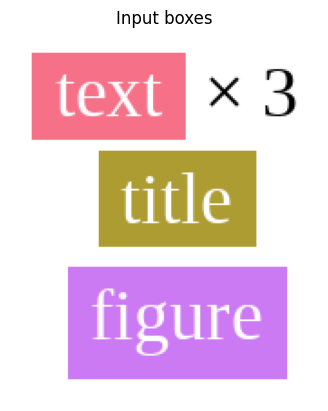


 ####################  Output visualization  ####################


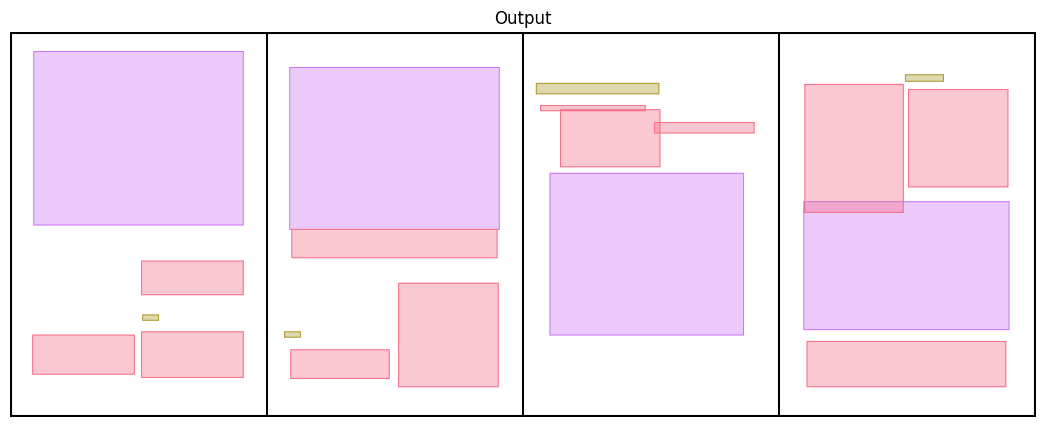

In [8]:
pred, _ = predict_layout(custom_input_from_tensor_default, list_files, model_name='layoutdm_publaynet', cond_type='c', verbatim=True, save_output=False)

### 2.2. Condition type 'cwh'
C+S -> P (reposition and dont' resize)


 ####################  Input visualization, elements and their dimensions ####################


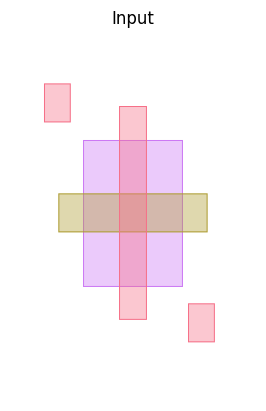


 ####################  Input visualization, labels  ####################


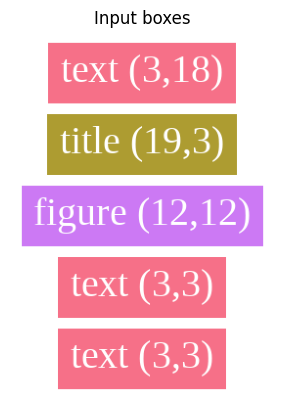


 ####################  Output visualization  ####################


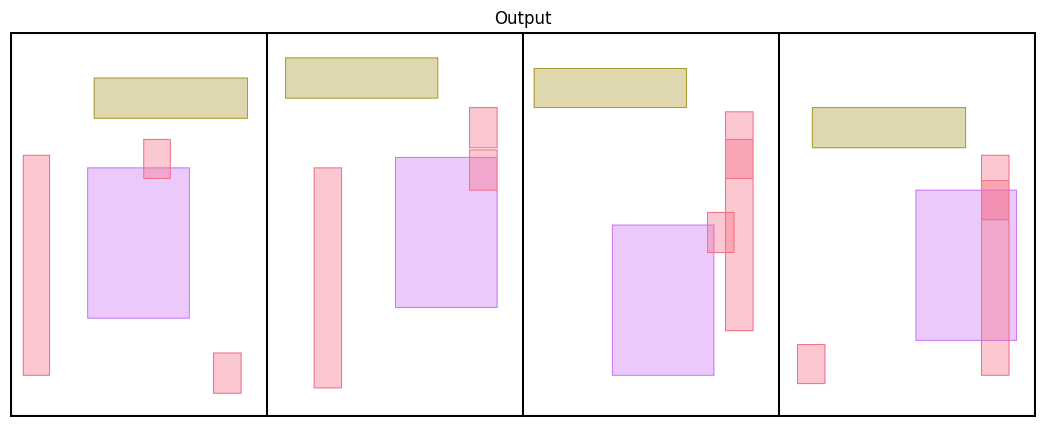

In [9]:
pred, _ = predict_layout(custom_input_from_tensor_default, list_files, model_name='layoutdm_publaynet', cond_type='cwh', verbatim=True, save_output=False)